# Import and Prepare

In [1]:
import os
from copy import deepcopy

import numpy as np
import pandas as pd

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score

import matplotlib.pyplot as plt

In [2]:
CSV_FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/AppStats Project/data.csv'

TEST_SIZE = 0.15
RANDOM_STATE = 42

In [3]:
df = pd.read_csv(CSV_FILE_PATH)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


# Train test split

In [5]:
y = (df['Bankrupt?']).to_numpy()
y

array([1, 1, 1, ..., 0, 0, 0])

In [6]:
X = df.drop('Bankrupt?', axis=1, inplace=False).to_numpy()
X

array([[0.37059426, 0.42438945, 0.40574977, ..., 0.56405011, 1.        ,
        0.01646874],
       [0.46429094, 0.53821413, 0.51673002, ..., 0.57017495, 1.        ,
        0.02079431],
       [0.42607127, 0.49901875, 0.47229509, ..., 0.56370608, 1.        ,
        0.01647411],
       ...,
       [0.47272461, 0.533744  , 0.52063815, ..., 0.5651584 , 1.        ,
        0.09764874],
       [0.50626432, 0.5599106 , 0.55404465, ..., 0.56530151, 1.        ,
        0.04400945],
       [0.49305319, 0.57010467, 0.54954762, ..., 0.56516694, 1.        ,
        0.23390224]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE)
print(  X_train.shape,
        X_test.shape,
        y_train.shape,
        y_test.shape
)

(5796, 95) (1023, 95) (5796,) (1023,)


(array([0, 1]), array([6599,  220]))
(array([0, 1]), array([5609,  187]))
(array([0, 1]), array([990,  33]))


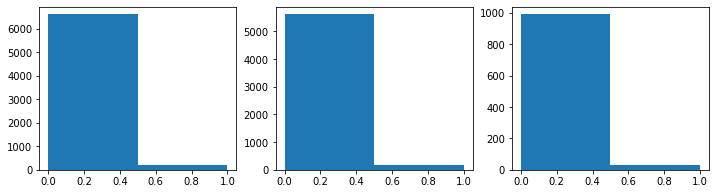

In [8]:
fig, ax = plt.subplots(1, 3)
fig.set_figheight(3)
fig.set_figwidth(12)

ax[0].hist(y, bins=2)
ax[1].hist(y_train, bins=2)
ax[2].hist(y_test, bins=2)

print(np.unique(y, return_counts=True))
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

# SMOTE over-sample 

In [9]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

(array([0, 1]), array([5609, 5609]))


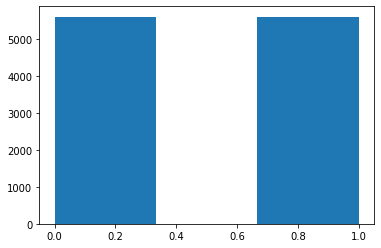

In [10]:
plt.hist(y_resampled, bins=3)
print(np.unique(y_resampled, return_counts=True))

# Lasso regress and Feature select

In [11]:
lasso = Lasso()
lasso.fit(X_resampled, y_resampled)
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -7.60601555e-12, -2.02039599e-11,
       -0.00000000e+00, -4.29783416e-10, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -9.13290782e-11, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -2.78446437e-11,  1.58382337e-10, -0.00000000e+00, -0.00000000e+00,
       -1.64610757e-10,  2.09617100e-11, -0.00000000e+00,  5.86998829e-11,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -9.91533641e-11, -7.93429830e-11, -3.21954065e-12,
        2.62846251e-11,  0.00000000e+00, -5.40620348e-11, -0.00000000e+00,
       -6.28927137e-11, -

In [12]:
zero_filter = lasso.coef_ != 0
zero_filter

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True, False,  True, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [13]:
sum(zero_filter)  # number of non-zero numbers

24

In [14]:
filtered_X_resampled = X_resampled.transpose()
filtered_X_resampled = filtered_X_resampled[zero_filter]
filtered_X_resampled = filtered_X_resampled.transpose()
print(filtered_X_resampled.shape)
filtered_X_resampled

(11218, 24)


array([[1.31709967e-04, 1.02000000e+09, 1.94019402e-04, ...,
        1.27000000e+09, 2.60621223e-01, 3.17818677e-03],
       [7.18000000e+09, 0.00000000e+00, 6.27062706e-04, ...,
        4.01000000e+09, 6.08504883e-01, 9.39829344e-04],
       [5.40000000e+09, 3.34000000e+09, 9.80098010e-04, ...,
        3.82000000e+08, 1.59617057e-01, 4.70266612e-03],
       ...,
       [4.48223900e+09, 0.00000000e+00, 3.84793418e-04, ...,
        2.74643691e+09, 2.18078353e-01, 2.30494580e-03],
       [5.88914426e+09, 0.00000000e+00, 7.84436958e-04, ...,
        1.32953152e+09, 5.20152134e-01, 3.74368277e-03],
       [6.79907937e+08, 3.39613497e+09, 8.34227598e-04, ...,
        8.67039865e+08, 6.93158212e-01, 3.76378515e-03]])

# Apply neural network, predict, and evaluate

In [15]:
clf = MLPClassifier(
    hidden_layer_sizes=(200, 200), random_state=RANDOM_STATE)
clf.fit(filtered_X_resampled, y_resampled)

MLPClassifier(hidden_layer_sizes=(200, 200), random_state=42)

In [16]:
# TODO: save model

In [17]:
filtered_X_test = X_test.transpose()
filtered_X_test = filtered_X_test[zero_filter]
filtered_X_test = filtered_X_test.transpose()

In [18]:
y_pred = clf.predict(filtered_X_test)

In [19]:
f1_score(y_true=y_test, y_pred=y_pred)

0.18840579710144928

In [20]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.8905180840664711

# Apply neural network without Lasso

In [21]:
clf_no_filter = MLPClassifier(
    hidden_layer_sizes=(200, 200), random_state=RANDOM_STATE)
clf_no_filter.fit(X_resampled, y_resampled)

MLPClassifier(hidden_layer_sizes=(200, 200), random_state=42)

In [22]:
# TODO: save model

In [23]:
y_pred_no_filter = clf_no_filter.predict(X_test)

In [24]:
f1_score(y_true=y_test, y_pred=y_pred_no_filter)

0.1257142857142857

In [25]:
accuracy_score(y_true=y_test, y_pred=y_pred_no_filter)

0.8504398826979472